In [1]:
!pip show tensorflow

Name: tensorflow
Version: 2.4.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/conda/lib/python3.7/site-packages
Requires: h5py, six, numpy, termcolor, wheel, gast, absl-py, protobuf, typing-extensions, wrapt, tensorboard, tensorflow-estimator, flatbuffers, keras-preprocessing, grpcio, opt-einsum, google-pasta, astunparse
Required-by: tensorflow-cloud, fancyimpute


In [2]:
!pip show tensorflow-hub

Name: tensorflow-hub
Version: 0.12.0
Summary: TensorFlow Hub is a library to foster the publication, discovery, and consumption of reusable parts of machine learning models.
Home-page: https://github.com/tensorflow/hub
Author: Google LLC
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/conda/lib/python3.7/site-packages
Requires: numpy, protobuf
Required-by: 


In [3]:
!pip install tf-nightly

     |████████████████████████████████| 467.9 MB 23 kB/s s eta 0:00:01   |█████▍                          | 78.6 MB 5.2 MB/s eta 0:01:15     |███████▏                        | 104.3 MB 76.6 MB/s eta 0:00:05     |████████▎                       | 120.4 MB 76.6 MB/s eta 0:00:05     |█████████████▉                  | 201.6 MB 64.5 MB/s eta 0:00:05     |██████████████████████████▌     | 387.0 MB 4.9 MB/s eta 0:00:17
     |████████████████████████████████| 1.3 MB 32.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 22.9 MB/s eta 0:00:01
     |████████████████████████████████| 463 kB 39.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 24.5 MB/s eta 0:00:01
     |████████████████████████████████| 12.8 MB 20.9 MB/s eta 0:00:01
     |████████████████████████████████| 5.7 MB 19.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 44.2 MB/s eta 0:00:01
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.32.0
    Uninstalling grpci

<div align="center">
    <h1>Plants Disease Detection</h1>
    <img src="https://agropecuariaoliveira.com/wp-content/uploads/2020/12/slide.jpg">
</div>

The Project is divided into two steps:
* Building and creating a machine learning model using TensorFlow with Keras
* Deploying the model to an Android application using TFLite

<div align="center">
   <h1>Machine Learning model using Tensorflow with Keras</h1>
    Machine learning model build by using CNN 
</div>

<h3>Importing the Libraries</h3>

In [4]:
!pip show tensorflow_hub


Name: tensorflow-hub
Version: 0.12.0
Summary: TensorFlow Hub is a library to foster the publication, discovery, and consumption of reusable parts of machine learning models.
Home-page: https://github.com/tensorflow/hub
Author: Google LLC
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/conda/lib/python3.7/site-packages
Requires: numpy, protobuf
Required-by: 


In [1]:
!pip show keras

Name: Keras
Version: 2.4.3
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: /opt/conda/lib/python3.7/site-packages
Requires: h5py, scipy, pyyaml, numpy
Required-by: fancyimpute


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
#tf.enable_eager_execution()

import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
#from keras import optimizers

In [2]:
# verify TensorFlow version

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Version:  2.4.1
Eager mode:  True
Hub version:  0.12.0
GPU is available


<h3>Loading the dataset & preparing train and validation dataset</h3>
Plant Village dataset is a public dataset of 54,305 images of diseased and healthy plant leaves collected under controlled conditions ( PlantVillage Dataset). The images cover 14 species of crops, including: apple, blueberry, cherry, grape, orange, peach, pepper, potato, raspberry, soy, squash, strawberry and tomato. It contains images of 17 basic diseases, 4 bacterial diseases, 2 diseases caused by mold (oomycete), 2 viral diseases and 1 disease caused by a mite. 12 crop species also have healthy leaf images that are not visibly affected by disease.

In [3]:
data_dir = os.path.join(os.path.abspath('../input/plantvillage/PlantVillage'))
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'val')

In [4]:
import time
import os
from os.path import exists

def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + "files"

In [5]:
print('total images for training :', count(train_dir))
print('total images for validation :', count(validation_dir))

total images for training : /kaggle/input/plantvillage/PlantVillage/train : 43444files
total images for validation : /kaggle/input/plantvillage/PlantVillage/val : 10861files


<h3>Loading the labels and mapping it with the dataset categories</h3>
categories.json file contains all the labels of 38 different classes of categories present in the PlantVillage dataset

In [6]:
import json

with open('../input/categories/categories.json', 'r') as f:
    cat_to_name = json.load(f)
    classes = list(cat_to_name.values())
    
print (classes)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [7]:
print('Number of classes:',len(classes))

Number of classes: 38


<h3>Selection of tf2/Hub module for use in the model</h3>

In [8]:
# Selecting inception_v3
module_selection = ("inception_v3", 299, 2048) 
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/2".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(
  MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

BATCH_SIZE = 64 #@param {type:"integer"}

Using https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/2 with input size (299, 299) and output dimension 2048


<h3>Data preprocessing</h3>
Data preprocessing is a data mining technique which is used to transform the raw data in a useful and efficient format. <br><br>
Steps Involved in Data Preprocessing: 
<h4>* Data Transformation: </h4> As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).
<h4>* Data Augmentation: </h4>
random distortions of an image each time it is read

In [9]:
# Inputs are suitably resized for the selected module. Dataset augmentation (i.e., random distortions of an image each time it is read) improves training, esp. when fine-tuning.

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, 
    shuffle=False, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

do_data_augmentation = True #@param {type:"boolean"}
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, 
      height_shift_range=0.2,
      shear_range=0.2, 
      zoom_range=0.2,
      fill_mode='nearest' )
else:
  train_datagen = validation_datagen
  
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    subset="training", 
    shuffle=True, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

Found 10861 images belonging to 38 classes.
Found 43444 images belonging to 38 classes.


<h3>Building the Model</h3>


In [10]:

feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE+(3,),
                                   output_shape=[FV_SIZE])

In [11]:
do_fine_tuning = False #@param {type:"boolean"}
if do_fine_tuning:
  feature_extractor.trainable = True
  # unfreeze some layers of base network for fine-tuning
  for layer in base_model.layers[-30:]:
    layer.trainable =True
else:
  feature_extractor.trainable = False

In [12]:
print("Building model with", MODULE_HANDLE)
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax',
                           kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
#model.build((None,)+IMAGE_SIZE+(3,))

model.summary()

Building model with https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/2
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 2048)              21802784  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 38)                19494     
Total params: 22,871,366
Trainable params: 1,068,582
Non-trainable params: 21,802,784
_________________________________________________________________


<h3>Specifying Loss function and Optimizer</h3>

In [13]:
#Compile model specifying the optimizer learning rate

LEARNING_RATE = 0.001 #@param {type:"number"}

model.compile(
   optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE), 
   loss='categorical_crossentropy',
   metrics=['accuracy'])

<h3>Training the Model</h3>

In [14]:
EPOCHS=5 #@param {type:"integer"}

history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
678/678 [==============================] - 1240s 2s/step - loss: 1.3683 - accuracy: 0.6416 - val_loss: 0.3901 - val_accuracy: 0.8802
Epoch 2/5
678/678 [==============================] - 1092s 2s/step - loss: 0.4216 - accuracy: 0.8663 - val_loss: 0.3539 - val_accuracy: 0.8817
Epoch 3/5
678/678 [==============================] - 1104s 2s/step - loss: 0.3639 - accuracy: 0.8827 - val_loss: 0.2968 - val_accuracy: 0.9070
Epoch 4/5
678/678 [==============================] - 1102s 2s/step - loss: 0.3186 - accuracy: 0.8971 - val_loss: 0.2805 - val_accuracy: 0.9063
Epoch 5/5
678/678 [==============================] - 1109s 2s/step - loss: 0.2947 - accuracy: 0.9019 - val_loss: 0.2414 - val_accuracy: 0.9197


<h3>Checking the performance</h3>
Plot training and validation accuracy and loss

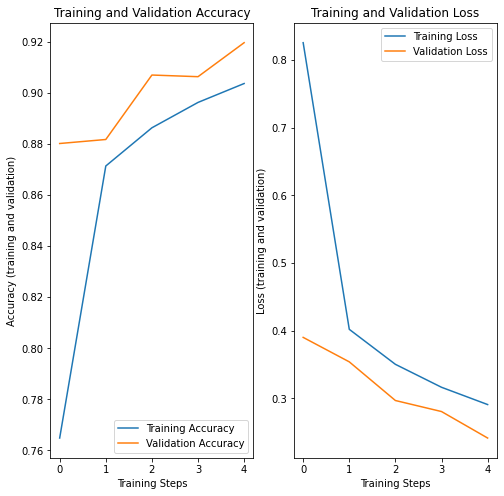

In [15]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

<h3>Random Test</h3>
Random sample images from validation dataset and predict

In [16]:
# Import OpenCV
import cv2

# Utility
import itertools
import random
from collections import Counter
from glob import iglob


def load_image(filename):
    img = cv2.imread(os.path.join(data_dir, validation_dir, filename))
    img = cv2.resize(img, (IMAGE_SIZE[0], IMAGE_SIZE[1]) )
    img = img /255
    
    return img


def predict(image):
    probabilities = model.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)
    
    return {classes[class_idx]: probabilities[class_idx]}

SOURCE: class: Tomato___Tomato_Yellow_Leaf_Curl_Virus, file: Tomato___Tomato_Yellow_Leaf_Curl_Virus/11e02c0b-902c-4d01-879f-5fb4b71d831d___UF.GRC_YLCV_Lab 03132.JPG
PREDICTED: class: Tomato___Tomato_Yellow_Leaf_Curl_Virus, confidence: 0.999481


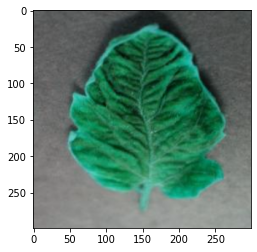

<Figure size 432x288 with 0 Axes>

SOURCE: class: Tomato___Tomato_Yellow_Leaf_Curl_Virus, file: Tomato___Tomato_Yellow_Leaf_Curl_Virus/f112226f-4a2e-4b09-a355-7d7e1ff9308f___YLCV_NREC 0308.JPG
PREDICTED: class: Tomato___Tomato_Yellow_Leaf_Curl_Virus, confidence: 0.999855


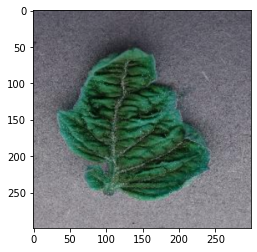

SOURCE: class: Pepper,_bell___Bacterial_spot, file: Pepper,_bell___Bacterial_spot/141a46fa-9293-4810-9cf6-b329346f8fb2___JR_B.Spot 8995.JPG
PREDICTED: class: Pepper,_bell___Bacterial_spot, confidence: 0.564937


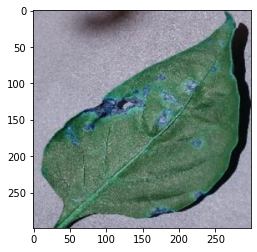

<Figure size 432x288 with 0 Axes>

SOURCE: class: Strawberry___Leaf_scorch, file: Strawberry___Leaf_scorch/bd1837c6-5386-4a16-9939-d36b45cedf21___RS_L.Scorch 0881.JPG
PREDICTED: class: Strawberry___Leaf_scorch, confidence: 0.994924


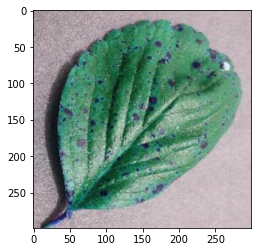

<Figure size 432x288 with 0 Axes>

SOURCE: class: Grape___Esca_(Black_Measles), file: Grape___Esca_(Black_Measles)/f97297d3-e374-44cf-8708-86764752e9c5___FAM_B.Msls 4073.JPG
PREDICTED: class: Grape___Esca_(Black_Measles), confidence: 0.483758


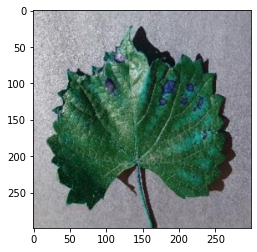

<Figure size 432x288 with 0 Axes>

In [21]:
for idx, filename in enumerate(random.sample(validation_generator.filenames, 5)):
    print("SOURCE: class: %s, file: %s" % (os.path.split(filename)[0], filename))
    
    img = load_image(filename)
    prediction = predict(img)
    print("PREDICTED: class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
    plt.imshow(img)
    plt.figure(idx)    
    plt.show()

<h3>Exporting saved model</h3>

In [22]:
import time
t = time.time()

export_path = "./{}".format(int(t))
model.save(export_path)

export_path

'./1629547807'

<h3>Reloading the Saved Model and Testing</h3>
Testing the saved model if it gives the same accuracy in classification

In [23]:
reloaded = tf.keras.models.load_model(export_path, custom_objects={'KerasLayer':hub.KerasLayer})

In [24]:
def predict_reload(image):
    probabilities = reloaded.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)
    
    return {classes[class_idx]: probabilities[class_idx]}

SOURCE: class: Corn_(maize)___healthy, file: Corn_(maize)___healthy/bea3239f-b794-42ee-bc3b-249fa2a53669___R.S_HL 8100 copy.jpg
PREDICTED: class: Corn_(maize)___healthy, confidence: 0.742394


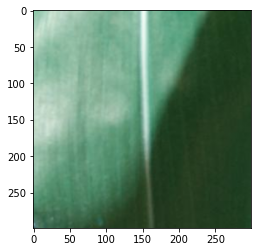

<Figure size 432x288 with 0 Axes>

SOURCE: class: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot, file: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/9ac3c670-7ccf-46a8-870c-c075a26374b0___RS_GLSp 9344.JPG
PREDICTED: class: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot, confidence: 0.682914


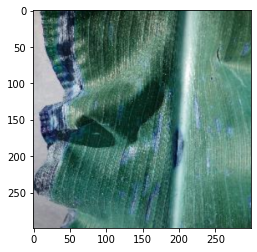

In [25]:
for idx, filename in enumerate(random.sample(validation_generator.filenames, 2)):
    print("SOURCE: class: %s, file: %s" % (os.path.split(filename)[0], filename))
    
    img = load_image(filename)
    prediction = predict_reload(img)
    print("PREDICTED: class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
    plt.imshow(img)
    plt.figure(idx)    
    plt.show()

<h3>Converting the saved model to tflite model</h3>

In [26]:
!mkdir "tflite_models"

In [27]:
TFLITE_MODEL = "tflite_models/plant_disease_model.tflite"


# Get the concrete function from the Keras model.
run_model = tf.function(lambda x : reloaded(x))

# Save the concrete function.
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype)
)

# Convert the model to standard TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converted_tflite_model = converter.convert()
open(TFLITE_MODEL, "wb").write(converted_tflite_model)

91523992